In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import datetime
print 'Done'

Done


In [2]:
import json
import pandas

#Function to read Tweets
def readTweets(path):
    data = open(path)
    itemlist = []
    for line in data:
        item = json.loads(line)
        itemlist.append(item)
    return itemlist

def createDF(TweetList):
    df = pandas.DataFrame(data=TweetList)
    return df

def colTypeViewer(df):
    rowManager = 0
    for key in df.columns.values:
        print key, str(type(df[key][0]))
        rowManager+=1
        if rowManager == 2:
            rowManager = 0
            print('')

In [3]:
iPhoneTweets = createDF(readTweets('After - iPhoneX_Tweets.json'))

print('Dataset Dimensions:')
print('\tNumber of Keys (Columns): ' + str(iPhoneTweets.shape[0]))
print('\tNumber of Entries (Rows): ' + str(iPhoneTweets.shape[1]))

Dataset Dimensions:
	Number of Keys (Columns): 100010
	Number of Entries (Rows): 31


In [4]:
iPhoneTweets.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries
0,None,None,Sun Nov 05 03:26:03 +0000 2017,"{u'symbols': [], u'media': [{u'source_user_id'...","{u'media': [{u'source_user_id': 164609710, u's...",0,False,None,927014120133623809,927014120133623809,...,NaN,NaN,22401,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @guiruch: #iPhoneX https://t.co/wotnKabhMP,False,"{u'follow_request_sent': None, u'has_extended_...",NaN
1,None,None,Sun Nov 05 03:26:03 +0000 2017,"{u'symbols': [], u'media': [{u'source_user_id'...","{u'media': [{u'source_user_id': 164609710, u's...",0,False,None,927014117570940928,927014117570940928,...,NaN,NaN,22401,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @guiruch: #iPhoneX https://t.co/wotnKabhMP,False,"{u'follow_request_sent': None, u'has_extended_...",NaN
2,None,None,Sun Nov 05 03:26:02 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,None,927014114165002240,927014114165002240,...,NaN,NaN,0,False,NaN,"<a href=""http://mugen.tw"" rel=""nofollow"">hoge2...",【悲報】iPhoneXでゲーム画面をスクショした結果…（画像あり） https://t.co...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN
3,None,None,Sun Nov 05 03:26:02 +0000 2017,"{u'symbols': [], u'media': [{u'source_user_id'...",{u'media': [{u'additional_media_info': {u'sour...,0,False,None,927014113330462720,927014113330462720,...,NaN,NaN,1203,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @stalman: The #iPhoneX face mapping is so m...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN
4,None,None,Sun Nov 05 03:26:02 +0000 2017,"{u'symbols': [], u'media': [{u'source_user_id'...","{u'media': [{u'source_user_id': 164609710, u's...",0,False,None,927014112302731266,927014112302731266,...,NaN,NaN,22401,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @guiruch: #iPhoneX https://t.co/wotnKabhMP,False,"{u'follow_request_sent': None, u'has_extended_...",NaN


In [17]:
# Extracting data from Tweet Dataset
tweetText = createDF(iPhoneTweets['text'])

In [18]:
import nltk
from nltk.corpus import stopwords
valid_words = set(nltk.corpus.words.words())

In [19]:
col = ['word']
pos_words = pandas.read_csv('positive-corpus.csv')
neg_words = pandas.read_csv('negative-corpus.csv')
pos_words.columns = col
neg_words.columns = col
pos_list = pos_words['word'].tolist()
neg_list = neg_words['word'].tolist()
senti_list = pos_list + neg_list

In [8]:
def clean_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>2]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    #cleaned_word = [x for x in cleaned_word if x in senti_list]
    #print cleaned_word
    return cleaned_word

In [9]:
clean_tweet = clean_tweet(tweetText.text)
clean_df = createDF(clean_tweet)
clean_df.head()

,0
0,the
1,face
2,much
3,unlocking
4,phone


In [10]:
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('clean_tweet_after_words.csv', encoding='utf-8')
top_words.head()

,word,count
0,day,10336
1,waste,10020
2,half,10018
3,queen,10005
4,new,4007


In [11]:
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,day,10336
1,waste,10020
2,half,10018
3,queen,10005
4,new,4007
5,the,2251
6,phone,1643
7,get,1426
8,much,1410
9,face,1296


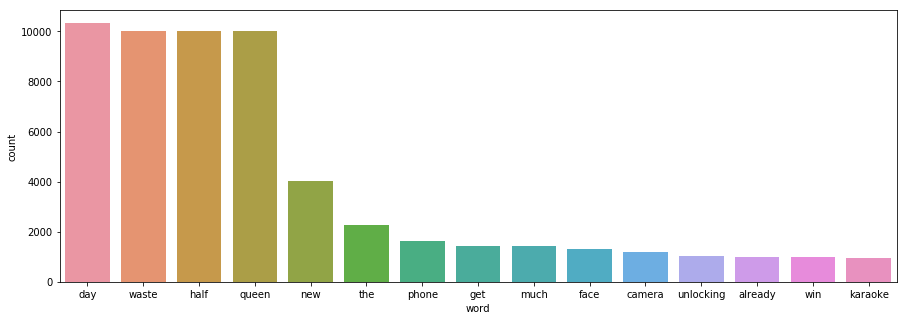

In [12]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'word', y = 'count', data = top_df)
plt.show()
fig.savefig('top_words_after_launch.png')

All frequencies, including STOPWORDS:
                 Word  Frequency
0         (half, day)      10007
1       (waste, half)      10003
2        (day, queen)      10000
3      (queen, waste)       3826
4  (unlocking, phone)       1016
5         (the, face)       1011
6   (much, unlocking)       1010
7        (face, much)       1010
8       (new, camera)        986
9      (new, already)        779


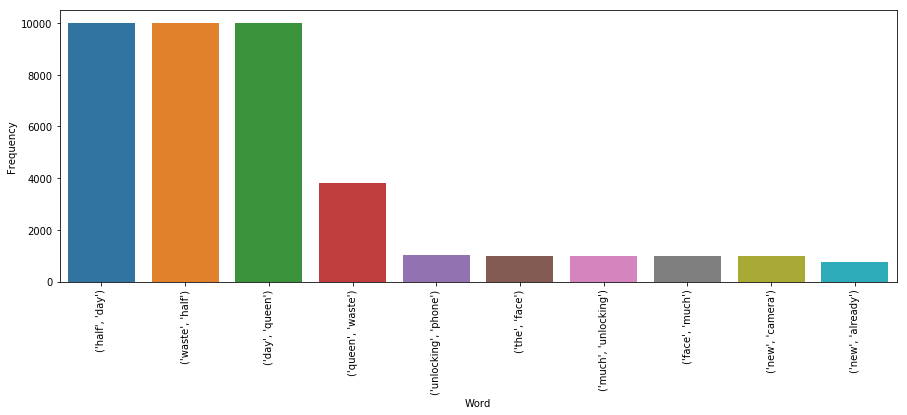

In [13]:
bgs2 = nltk.bigrams(clean_tweet)

# compute frequency distribution for all the bigrams 
fdist2 = nltk.FreqDist(bgs2)

rslt2 = pd.DataFrame(Counter(fdist2).most_common(10),columns=['Word', 'Frequency'])
print('All frequencies, including STOPWORDS:')
print('=' * 60)
print(rslt2)
print('=' * 60)


fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'Word', y = 'Frequency', data = rslt2)
plt.xticks(rotation= 90)
plt.show()
fig.savefig('bigram_after_launch.png',bbox_inches = 'tight')

In [14]:
def get_only_sentiment_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in senti_list]
    #print cleaned_word
    return cleaned_word

In [15]:
clean_sentiment = get_only_sentiment_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('sentiment_after_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,waste,10020
1,win,976
2,broken,809
3,like,801
4,cute,798
5,ruined,778
6,free,754
7,fun,553
8,love,413
9,pretty,408


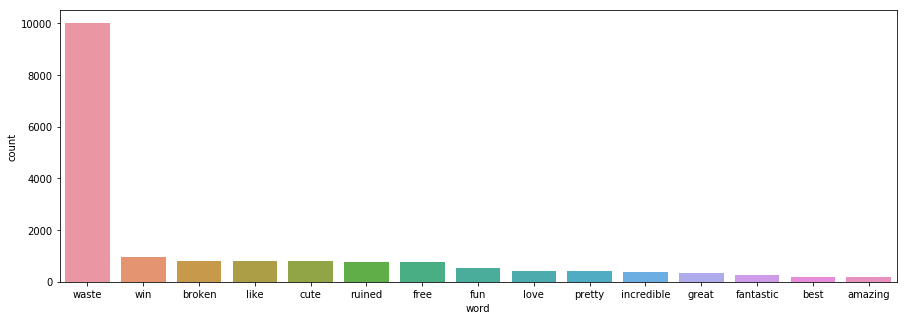

In [16]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'word', y = 'count', data = top_df)
plt.show()
fig.savefig('top_sentiment_words_after_launch.png')

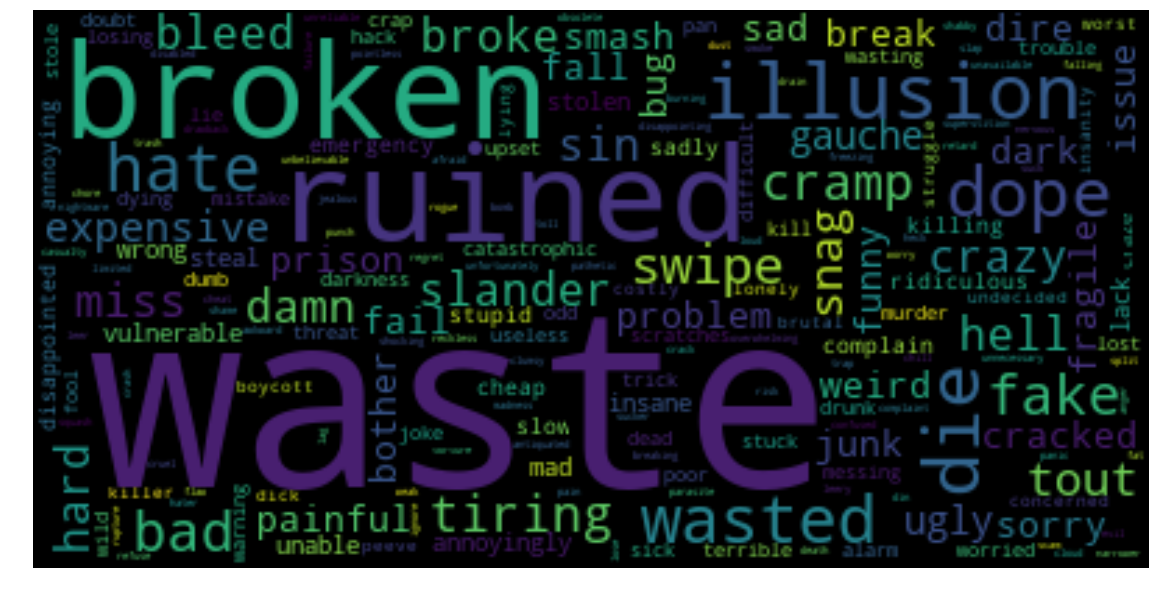

In [108]:
top_words.to_csv('sentiment_after_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)

d = {}
for a, x in top_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
def get_positive_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in pos_list]
    #print cleaned_word
    return cleaned_word

In [ ]:
clean_sentiment = get_positive_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('positive_after_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

In [144]:
top_df = pandas.read_csv('positive_after_words.csv')
top_df = top_df.sort_values('count', ascending=False)
top_df = top_df.head(15)

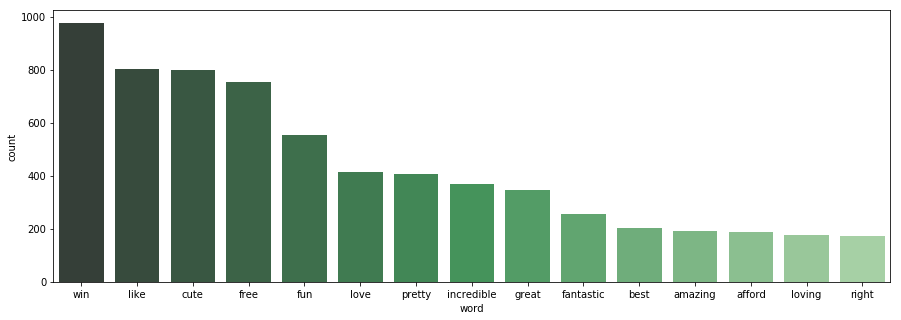

In [145]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
pal = sns.color_palette("Greens_d",len(top_df['count']))
sns.barplot(x = 'word', y = 'count', data = top_df,palette=pal)
plt.show()
fig.savefig('top_positive_words_after_launch.png')

In [36]:
def get_negative_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in neg_list]
    #print cleaned_word
    return cleaned_word

In [ ]:
clean_sentiment = get_negative_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('negative_after_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)

In [132]:
top_df = pandas.read_csv('negative_after_words.csv')
top_df = top_df.sort_values('count', ascending=False)
top_df = top_df.head(15)

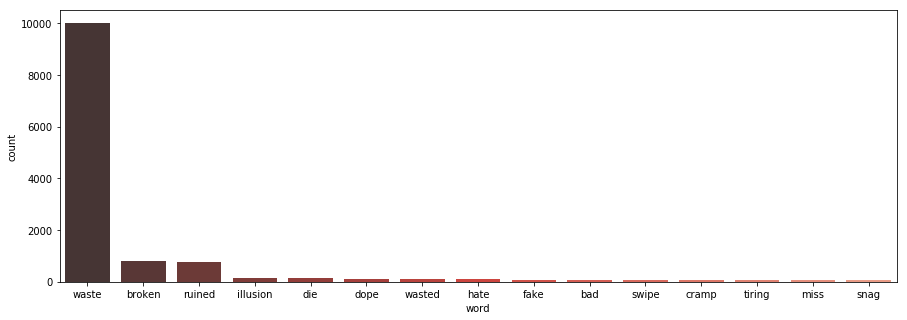

In [133]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
pal = sns.color_palette("Reds_d",len(top_df['count']))
sns.barplot(x = 'word', y = 'count', data = top_df,palette=pal)
plt.show()
fig.savefig('top_negative_words_after_launch.png')

In [138]:
top_df = top_df[2:] 

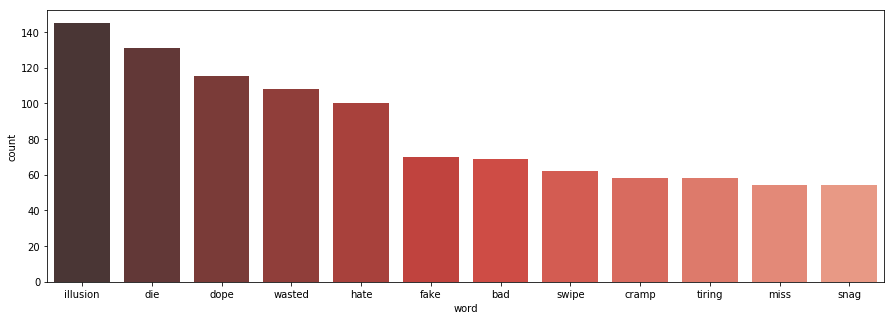

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
pal = sns.color_palette("Reds_d",len(top_df['count']))
sns.barplot(x = 'word', y = 'count', data = top_df,palette=pal)
plt.show()
fig.savefig('top_negative_words_after_launch_first3_removed.png')